## Introduction to Regression with NN in TensorFlow



In [37]:
import tensorflow as tf

In [38]:
print(tf.__version__)

2.14.0


In [39]:
import numpy as np
import matplotlib.pyplot as plt

### creating features

In [40]:
x=np.array([-10.,-4.,2.,4.,6.,8.,10.,14.])

In [41]:
y=np.array([-6.,-4.,5.,9.,16.,18.,20.,26.])

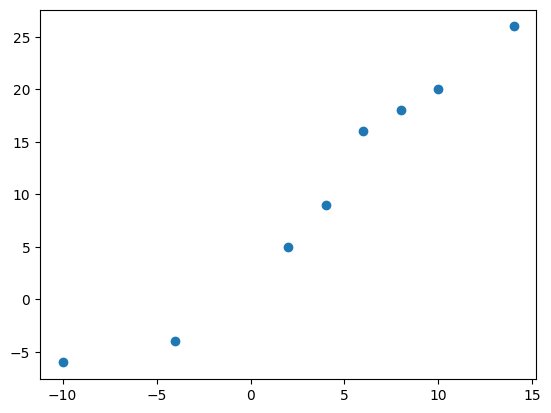

In [42]:
plt.scatter(x,y)

### input and output shape



In [43]:
# creating tensor for housing price prediction
h_info = tf.constant(['bed','bath','garage'])
h_price = tf.constant([939700])
h_info,h_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bed', b'bath', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [44]:
X = tf.cast(tf.constant(x,shape=(8,1)),dtype=tf.float32)
Y=tf.cast(tf.constant(y),dtype=tf.float32)
X,Y

(<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-10.],
        [ -4.],
        [  2.],
        [  4.],
        [  6.],
        [  8.],
        [ 10.],
        [ 14.]], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([-6., -4.,  5.,  9., 16., 18., 20., 26.], dtype=float32)>)

In [45]:
X.shape

TensorShape([8, 1])

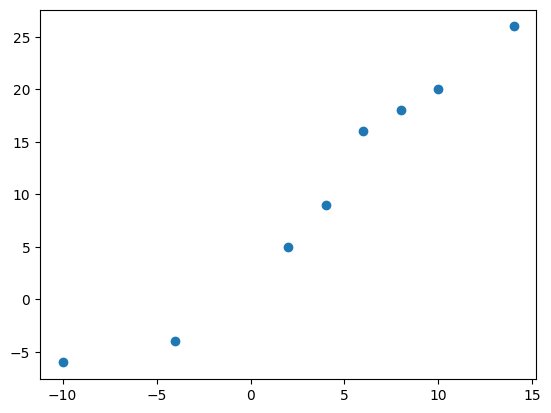

In [46]:
plt.scatter(X,Y)

### steps in modelling with tnesorflow

1. **Creating a model** - Define the input and output layers, as well as the hidden layers of a deep learning model
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer ( tells our model how to improve the patterns its learning) and the evaluation metrics ( what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between x and y (features and labels)

In [47]:
# set random seed
tf.random.set_seed(10)

# 1. create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(X, Y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 693ms/step - loss: 17.0433 - mae: 17.0433
Epoch 2/5
1/1 [==============================] - 0s 14ms/step - loss: 16.5152 - mae: 16.5152
Epoch 3/5
1/1 [==============================] - 0s 11ms/step - loss: 15.9870 - mae: 15.9870
Epoch 4/5
1/1 [==============================] - 0s 11ms/step - loss: 15.4589 - mae: 15.4589
Epoch 5/5
1/1 [==============================] - 0s 12ms/step - loss: 14.9308 - mae: 14.9308


In [48]:
model.predict([-4])

1/1 [==============================] - 0s 225ms/step


array([[0.80577457]], dtype=float32)

![Model](https://drive.google.com/file/d/11YzZoxdVMMKsP3VEhr8RKIsBBUS2qNAj/view?usp=sharing)

### Improving the model

we can improve the model by altering the steps we took to create the model

1. **Creating a model** - here we might add more layers,
increase the number of hidden units(neurons) within each of the hidden layers, change the activation function of each layer

2. **Compiling the model** - here we might change the optimization function or perhaps the learning rate of the optimization function

3. Fitting the model - here we might fit a model for more epochs (training for longer duration) or on more data(give the model more data to learn from)

### Common ways to improve model
- Adding layers
- Increase the number of hidden units
- Change the activation function
- Change the optimization function
- Change the learning rate
- Fitting on more data
- Fitting for longer learning(epochs)

### Model evaluation
**Visualization**
- The Data - what data are we working with ? what does it look like
- The model itself - what does our model look like
- The training of a model - how does a model perform while it learns
- The prediction of the model - how do the prediction of model line up against the ground truth

In [49]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)
model.fit(X,Y,epochs=5)

'''
from keras.src.optimizers.nadam import optimizer
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(lr=0.00001),
    metrics=["mae"]
)
model.fit(X,Y,epochs=100)
'''

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 20.9152 - mae: 20.9152
Epoch 2/5
1/1 [==============================] - 0s 22ms/step - loss: 20.3871 - mae: 20.3871
Epoch 3/5
1/1 [==============================] - 0s 17ms/step - loss: 19.8589 - mae: 19.8589
Epoch 4/5
1/1 [==============================] - 0s 21ms/step - loss: 19.3308 - mae: 19.3308
Epoch 5/5
1/1 [==============================] - 0s 21ms/step - loss: 18.8027 - mae: 18.8027


'\nfrom keras.src.optimizers.nadam import optimizer\nmodel = tf.keras.Sequential([\n    tf.keras.layers.Dense(1)\n])\nmodel.compile(\n    loss=tf.keras.losses.mae,\n    optimizer=tf.keras.optimizers.Adam(lr=0.00001),\n    metrics=["mae"]\n)\nmodel.fit(X,Y,epochs=100)\n'

### new model

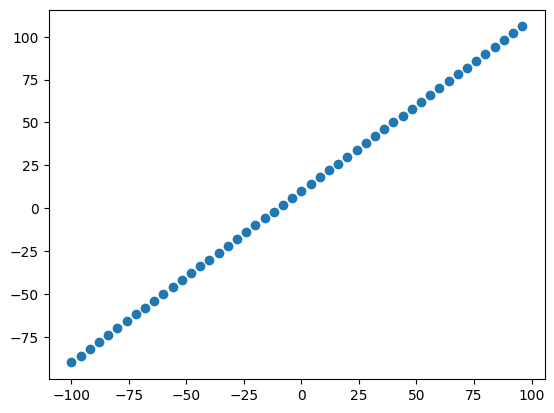

In [50]:
x=tf.range(-100,100,4)
y=x+10
plt.scatter(x,y)

### three sets
- Training set (model learns from this data, typically 70-80% of data)
- Validation set - the model gets tuned on this data, which is 10-15% of the data
- Test set - the model gets evaluated on this data to test what it has learned

Course material(training set) -> Practice exam(validation test) -> Final exam(test set)

In [51]:
len(x)

50

In [52]:
x_train = x[:40]
y_train = y[:40]
x_test = x[40:]
y_test = y[40:]

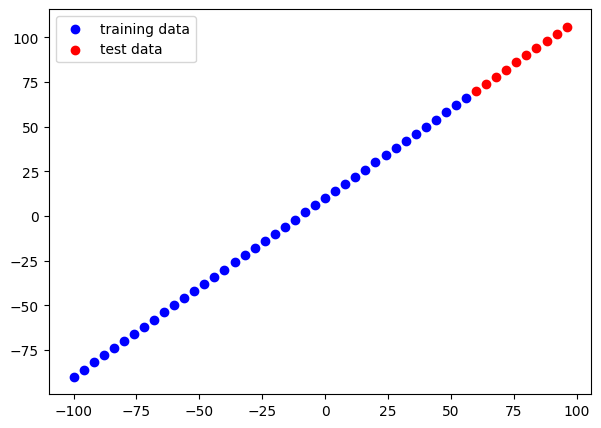

In [53]:
# Visualize data
plt.figure(figsize=(7,5))
plt.scatter(x_train,y_train,c='b',label="training data")
plt.scatter(x_test,y_test,c='r',label="test data")
plt.legend();

In [54]:
x_train=tf.expand_dims(x_train,axis=-1)
x_train.shape

TensorShape([40, 1])

In [55]:
x_train=tf.squeeze(x_train)
x_train.shape

TensorShape([40])

In [56]:
x_train[0].shape

TensorShape([])

### input_shape observation
'''   
x=tf.range(-100,100,4)
x_train = x[:40]


when shape is TensorShape([40])   
then tf.keras.layers.Dense(1,input_shape=(1,))   
also model.build(input_shape=(1,))

after using x_train=tf.expand_dims(x_train,axis=-1)   
when TensorShape([40, 1])   
then tf.keras.layers.Dense(1,input_shape=(1,1))   
also model.build(input_shape=(1,1))

look for x_train[0].shape

when TensorShape([])
then
tf.keras.layers.Dense(1,input_shape=(1,))   
equivalent to   
tf.keras.layers.Dense(1,input_shape=[1])   

when TensorShape([1])
then
tf.keras.layers.Dense(1,input_shape=(1,1))   
equivalent to   
tf.keras.layers.Dense(1,input_shape=[1,1])
'''

### Meaning of Dense is Fully connected

all of the neurons in the layer is fully connected to layers ine next layer

- **total params** - total number of parameter in the model, these are the patterns model is going to use
- **Trainable param** - these are the parameters (patterns) the model can update as it trains
- **non trainable params** - these params aren.t updated during training(this is typical when you bring in already learn params from other models during **transfer learning** .

reset the model by re-instantiating the model,    
otherwise running model.fit will learn more epochs

📚 Resources: MIT's course of intro to deep learning

#### verbose
model.fit(x_train,y_train,epochs=5,verbose=1)   
verbose   
=0 silent   
=1 progress bar   
=2 one line per epoch   

  


In [57]:
# create model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=(1,))
])
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

model.fit(x_train,y_train,epochs=5)



Epoch 1/5
2/2 [==============================] - 1s 10ms/step - loss: 36.2565 - mae: 36.2565
Epoch 2/5
2/2 [==============================] - 0s 9ms/step - loss: 36.1762 - mae: 36.1762
Epoch 3/5
2/2 [==============================] - 0s 8ms/step - loss: 36.0933 - mae: 36.0933
Epoch 4/5
2/2 [==============================] - 0s 8ms/step - loss: 36.0073 - mae: 36.0073
Epoch 5/5
2/2 [==============================] - 0s 15ms/step - loss: 35.9250 - mae: 35.9250


In [58]:
# create model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

#model.fit(x_train,y_train,epochs=10)

# specify input_shape in Sequential step for an automatic build
model.build(input_shape=(1,1))

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (1, 1)                    2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Visualizing model

In [59]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
2/2 [==============================] - 1s 12ms/step - loss: 7.6600 - mae: 7.6600
Epoch 2/5
2/2 [==============================] - 0s 11ms/step - loss: 7.6464 - mae: 7.6464
Epoch 3/5
2/2 [==============================] - 0s 10ms/step - loss: 7.6397 - mae: 7.6397
Epoch 4/5
2/2 [==============================] - 0s 10ms/step - loss: 7.6272 - mae: 7.6272
Epoch 5/5
2/2 [==============================] - 0s 10ms/step - loss: 7.6258 - mae: 7.6258


In [60]:
whos

Variable     Type           Data/Info
-------------------------------------
X            EagerTensor    tf.Tensor(\n[[-10.]\n [ -<...>pe=(8, 1), dtype=float32)
Y            EagerTensor    tf.Tensor([-6. -4.  5.  9<...>hape=(8,), dtype=float32)
h_info       EagerTensor    tf.Tensor([b'bed' b'bath'<...>shape=(3,), dtype=string)
h_price      EagerTensor    tf.Tensor([939700], shape=(1,), dtype=int32)
model        Sequential     <keras.src.engine.sequent<...>object at 0x7eb87e6921a0>
model1       Sequential     <keras.src.engine.sequent<...>object at 0x7eb87f547640>
np           module         <module 'numpy' from '/us<...>kages/numpy/__init__.py'>
plot_model   function       <function plot_model at 0x7eb89882ef80>
plt          module         <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
tf           module         <module 'tensorflow' from<...>/tensorflow/__init__.py'>
x            EagerTensor    tf.Tensor(\n[-100  -96  -<...>shape=(50,), dtype=int32)
x_test       EagerTensor   

In [61]:
del model

In [62]:
model1=tf.keras.Sequential([
    #tf.keras.layers.Dense(1,input_shape=(1,))
    tf.keras.layers.Dense(1,input_shape=[1,1])
])
model1.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=tf.keras.metrics.mae
)
model1.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1, 1)              2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [63]:
x_train=tf.expand_dims(x_train,axis=-1)
x_train.shape

TensorShape([40, 1])

In [64]:
x_train[0].shape

TensorShape([1])

In [65]:
model1.fit(x_train,y_train,epochs=5)

Epoch 1/5
2/2 [==============================] - 1s 11ms/step - loss: 44.9718 - mean_absolute_error: 44.9718
Epoch 2/5
2/2 [==============================] - 0s 8ms/step - loss: 42.5538 - mean_absolute_error: 42.5538
Epoch 3/5
2/2 [==============================] - 0s 8ms/step - loss: 41.2245 - mean_absolute_error: 41.2245
Epoch 4/5
2/2 [==============================] - 0s 7ms/step - loss: 40.8549 - mean_absolute_error: 40.8549
Epoch 5/5
2/2 [==============================] - 0s 8ms/step - loss: 40.7889 - mean_absolute_error: 40.7889


In [66]:
model1.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1, 1)              2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## visualize model


In [67]:
from tensorflow.keras.utils import plot_model

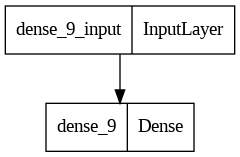

In [68]:
plot_model(model=model1)

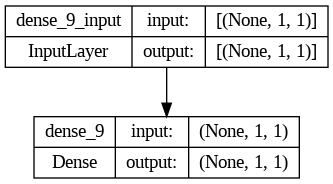

In [69]:
plot_model(model=model1,show_shapes=True)

In [70]:
model1=tf.keras.Sequential([
    #tf.keras.layers.Dense(1,input_shape=(1,))
    tf.keras.layers.Dense(10,input_shape=[1,1],name="input_layer"),
    tf.keras.layers.Dense(1,input_shape=[1,1],name="output_layer")
],name="oneofmodel")
model1.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=tf.keras.metrics.mae
)
model1.summary()

Model: "oneofmodel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 1, 10)             20        
                                                                 
 output_layer (Dense)        (None, 1, 1)              11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [71]:
model1.summary()

Model: "oneofmodel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 1, 10)             20        
                                                                 
 output_layer (Dense)        (None, 1, 1)              11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [72]:
model1.fit(x_train,y_train,epochs=5)

Epoch 1/5
2/2 [==============================] - 1s 10ms/step - loss: 41.4014 - mean_absolute_error: 41.4014
Epoch 2/5
2/2 [==============================] - 0s 9ms/step - loss: 40.6615 - mean_absolute_error: 40.6615
Epoch 3/5
2/2 [==============================] - 0s 27ms/step - loss: 40.7089 - mean_absolute_error: 40.7089
Epoch 4/5
2/2 [==============================] - 0s 8ms/step - loss: 40.7272 - mean_absolute_error: 40.7272
Epoch 5/5
2/2 [==============================] - 0s 7ms/step - loss: 40.7674 - mean_absolute_error: 40.7674


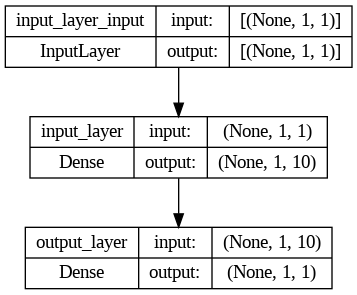

In [73]:
plot_model(model=model1,show_shapes=True)

### visualize models prediction

To visualize, plot prediction against the ground truth   
e.g. y_test vs y_pred

In [74]:
y_pred = model1.predict(tf.expand_dims(x_test,axis=-1))
y_pred

1/1 [==============================] - 0s 239ms/step


array([[[1.3091722]],

       [[1.3975288]],

       [[1.4858798]],

       [[1.5742328]],

       [[1.6625891]],

       [[1.7509383]],

       [[1.8392892]],

       [[1.9276495]],

       [[2.0160046]],

       [[2.1043534]]], dtype=float32)

### visualzing output

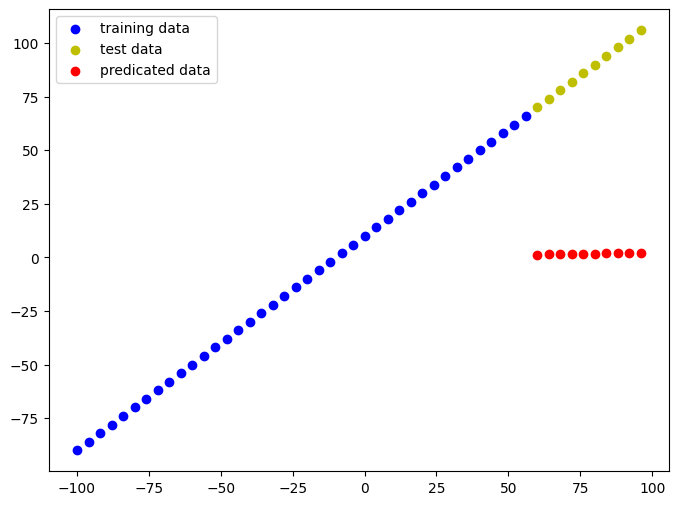

In [75]:
from os import name
plt.figure(figsize=(8,6))
plt.scatter(x_train,y_train,c='b',label="training data")
plt.scatter(x_test,y_test,c='y',label="test data")
plt.scatter(x_test,y_pred,c='r',label="predicated data")
plt.legend()

In [76]:
def plot_compare(xtrain=x_train,ytrain=y_train,xtest=x_test,ytest=y_test,pred=y_pred):
  """
plots training,test and predicted data
  """
  plt.figure(figsize=(8,6))
  plt.scatter(xtrain,ytrain,c="b",label="train data")
  plt.scatter(xtest,ytest,c="y",label="test data")
  plt.scatter(xtest,pred,c="r",label="predicted data")
  plt.legend()
  plt.show()

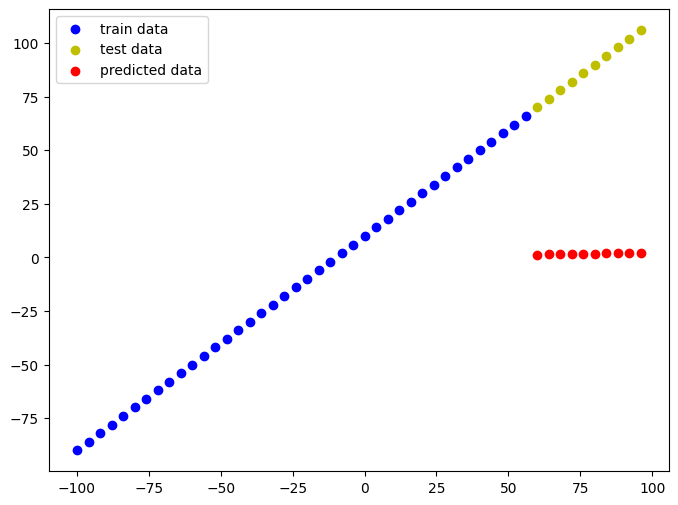

In [77]:
plot_compare()

In [78]:
model1.summary()

Model: "oneofmodel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 1, 10)             20        
                                                                 
 output_layer (Dense)        (None, 1, 1)              11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [79]:
tf.metrics.mean_absolute_error(x_test,y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[76.69083 ],
       [76.60247 ],
       [76.51412 ],
       [76.425766],
       [76.33741 ],
       [76.24906 ],
       [76.16071 ],
       [76.07235 ],
       [75.98399 ],
       [75.895645]], dtype=float32)>

In [80]:
y_pred.shape

(10, 1, 1)

In [81]:
y_pred=tf.squeeze(y_pred)

### Evaluating model's prediction with regression evaluation metrics

two main metrics are:
* MAE - Mean absolute error = on average how wrong is each of the model's prediction
* MSE - Mean squared error - useful when evaluating outliers
* Huber - MAE and MSE - tf.keras.losses.Huber()

In [82]:
# data creation
a=tf.range(-100,100,5)
b=a+20
a,b

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -95,  -90,  -85,  -80,  -75,  -70,  -65,  -60,  -55,  -50,
         -45,  -40,  -35,  -30,  -25,  -20,  -15,  -10,   -5,    0,    5,
          10,   15,   20,   25,   30,   35,   40,   45,   50,   55,   60,
          65,   70,   75,   80,   85,   90,   95], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-80, -75, -70, -65, -60, -55, -50, -45, -40, -35, -30, -25, -20,
        -15, -10,  -5,   0,   5,  10,  15,  20,  25,  30,  35,  40,  45,
         50,  55,  60,  65,  70,  75,  80,  85,  90,  95, 100, 105, 110,
        115], dtype=int32)>)

In [83]:
a_train=a[:30]
b_train=b[:30]
a_test=a[30:]
b_test=b[30:]

In [84]:
model_a=tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1],name="Inputlayer_1")
],name="model_A")
model_a.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=tf.keras.metrics.mse
)
model_a.build()

In [85]:
model_a.summary()

Model: "model_A"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Inputlayer_1 (Dense)        (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [86]:
from tensorflow.keras.utils import plot_model

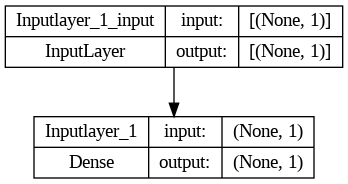

In [87]:
plot_model(model_a,show_shapes=True)

In [88]:
model_a.fit(a_train,b_train,epochs=5,verbose=1)

Epoch 1/5
1/1 [==============================] - 1s 527ms/step - loss: 25.9077 - mean_squared_error: 894.9561
Epoch 2/5
1/1 [==============================] - 0s 25ms/step - loss: 14.5452 - mean_squared_error: 314.8669
Epoch 3/5
1/1 [==============================] - 0s 33ms/step - loss: 15.8463 - mean_squared_error: 293.7386
Epoch 4/5
1/1 [==============================] - 0s 21ms/step - loss: 17.0409 - mean_squared_error: 408.1433
Epoch 5/5
1/1 [==============================] - 0s 12ms/step - loss: 15.8337 - mean_squared_error: 293.3372


In [89]:
model_a.evaluate(a_train,b_train)

1/1 [==============================] - 0s 380ms/step - loss: 17.0376 - mean_squared_error: 407.9339


[17.037559509277344, 407.9338684082031]

In [90]:
b_pred=model_a.predict(a_test)

1/1 [==============================] - 0s 69ms/step


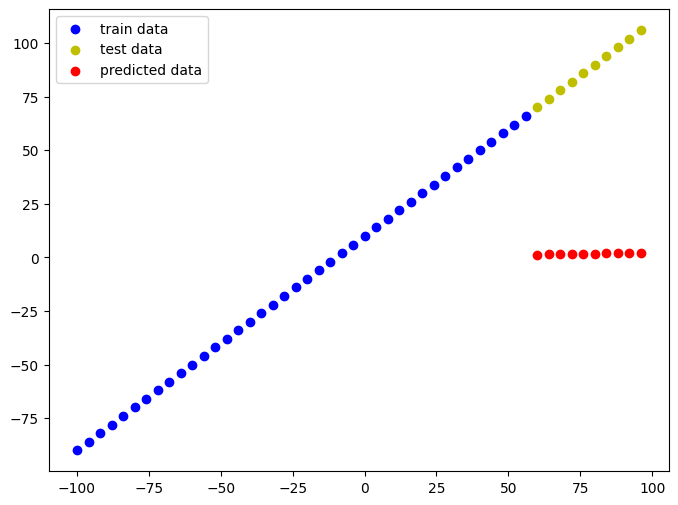

In [91]:
x_train=a_train
y_train=b_train
x_test=a_test
y_test=b_test
y_pred=b_pred
plot_compare()

In [92]:
tf.keras.metrics.mean_absolute_error(y_test,tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=50.84848>

In [93]:
y_pred.shape

(10, 1)

In [94]:
y_test.shape

TensorShape([10])

In [95]:
tf.keras.losses.huber(y_test,tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=50.34848>

In [97]:
model2=tf.keras.Sequential([
    tf.keras.layers.Dense(100,input_shape=[1],name="layer1"),
    tf.keras.layers.Dense(1,name="outputlayer")
],name="model2")
model2.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=tf.keras.metrics.mse)

model2.build()

In [99]:
model2.summary()

Model: "model2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 100)               200       
                                                                 
 outputlayer (Dense)         (None, 1)                 101       
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


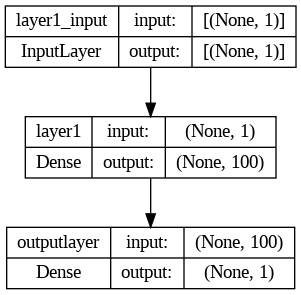

In [101]:
plot_model(model2,show_shapes=True)

In [103]:
model2.fit(x_train,y_train,epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 21ms/step - loss: 36.7089 - mean_squared_error: 1936.2875
Epoch 2/10
1/1 [==============================] - 0s 17ms/step - loss: 32.8679 - mean_squared_error: 1444.2832
Epoch 3/10
1/1 [==============================] - 0s 19ms/step - loss: 28.8621 - mean_squared_error: 1028.3628
Epoch 4/10
1/1 [==============================] - 0s 17ms/step - loss: 22.0802 - mean_squared_error: 654.9487
Epoch 5/10
1/1 [==============================] - 0s 13ms/step - loss: 29.5876 - mean_squared_error: 1105.3544
Epoch 6/10
1/1 [==============================] - 0s 26ms/step - loss: 18.6083 - mean_squared_error: 476.0101
Epoch 7/10
1/1 [==============================] - 0s 14ms/step - loss: 26.1967 - mean_squared_error: 783.7195
Epoch 8/10
1/1 [==============================] - 0s 15ms/step - loss: 19.3355 - mean_squared_error: 510.7231
Epoch 9/10
1/1 [==============================] - 0s 23ms/step - loss: 24.6608 - mean_squared_error: 664.3143
Epoch 

In [104]:
y_pred2=model2.predict(x_test)

1/1 [==============================] - 0s 114ms/step


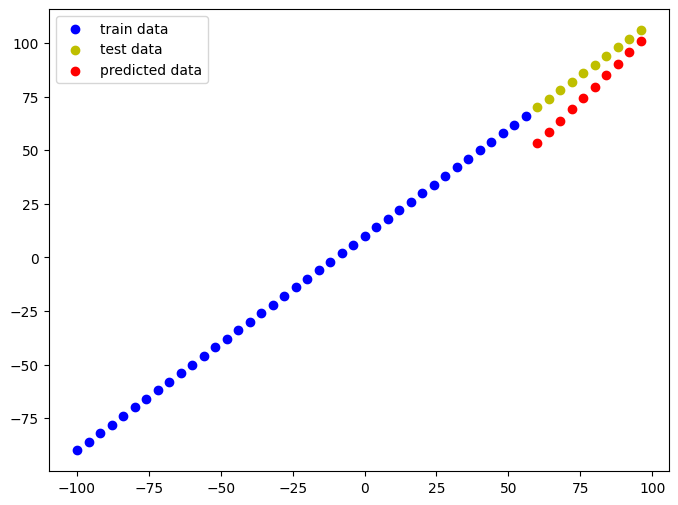

In [105]:
plot_compare(pred=y_pred2)

In [106]:
model2.evaluate(x_test,y_test)

1/1 [==============================] - 1s 504ms/step - loss: 15.4003 - mean_squared_error: 237.9558


[15.400323867797852, 237.955810546875]

In [111]:
tf.keras.metrics.mae(y_test,tf.squeeze(y_pred2))

<tf.Tensor: shape=(), dtype=float32, numpy=15.40033>

In [110]:
y_pred2.shape

(10, 1)

### tools for tracking experiments
* tensorboard - a component of the tensorflow library to help track modelling experiments
* weights and biases - a tool for tracking all kinds of ML experiments (plugs straight into tensorboard)

### Saving the model
two major format to save model
1. savedmodel format - *.pb format protobuff file
2. HDF5 format

model.save("filepath/filename")   
model.save("filename.h5")
   
**Load model**   
new_model2=tf.keras.models.load_model("/content/saving_model2")

In [112]:
model2.save("saving_model2")

In [113]:
model2.save("model2_h.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [116]:
new_model2=tf.keras.models.load_model("/content/saving_model2")

In [117]:
new_model2.summary()

Model: "model2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 100)               200       
                                                                 
 outputlayer (Dense)         (None, 1)                 101       
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [118]:
new_model2=tf.keras.models.load_model("/content/model2_h.h5")

In [119]:
new_model2.summary()

Model: "model2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 100)               200       
                                                                 
 outputlayer (Dense)         (None, 1)                 101       
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


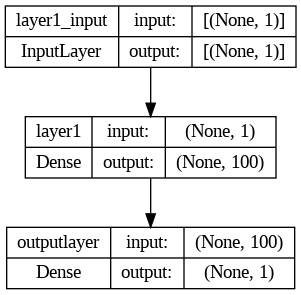

In [120]:
plot_model(new_model2,show_shapes=True)

### Download models to local computer
1. download from files tab and download
2. use python code
```
from google.colab import files
files.download("/content/model2_h.h5")
```
3. save to google drive
```
!cp /content/model2_h.h5  /content/drive/MyDrive/
```


In [121]:
from google.colab import files

In [122]:
files.download("/content/model2_h.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [124]:
!cp /content/model2_h.h5  /content/drive/MyDrive/